In [1]:
# Data manipulation
import pandas as pd
import numpy as np  
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns  


# Display settings
pd.set_option("display.max_columns", None)

In [2]:
# Upload Data set

df = pd.read_csv("imdb_movies.csv")

# Quick overview
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [5]:
df = df.rename(columns={
    "IMDB_Rating": "rating",
    "Genre": "genre",
    "Released_Year": "year",
    "Gross": "revenue"
})


In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Clean year (some might have '2005(I)' etc.)
df["year"] = df["year"].astype(str).str.extract(r"(\d{4})").astype(float)

# Clean revenue (remove commas and convert to float)
df["revenue"] = df["revenue"].astype(str).str.replace(",", "").astype(float)

# Drop rows with missing essential values
df = df.dropna(subset=["rating", "genre", "year", "revenue"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_10092\3018924832.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating.head(10).values, y=genre_rating.head(10).index, palette="viridis")


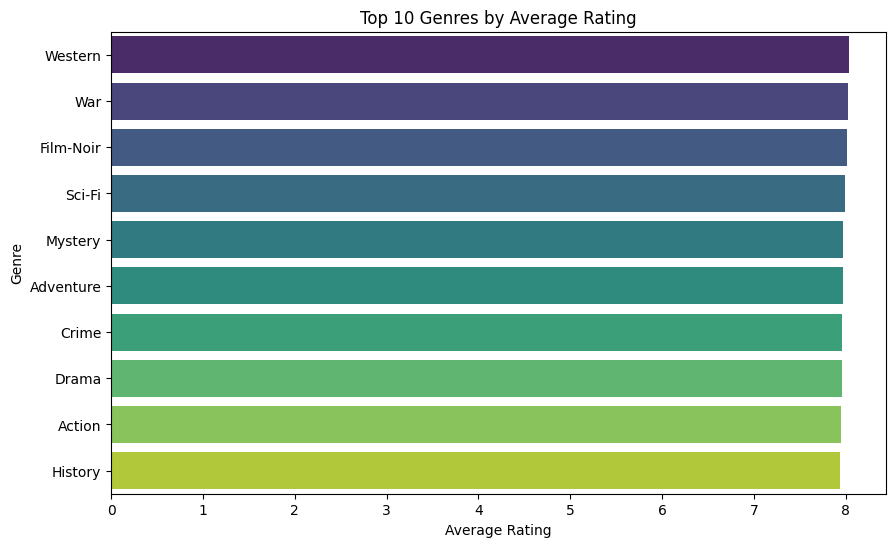

In [8]:
# Split multiple genres into separate rows
df_expanded = df.assign(genre=df['genre'].str.split(',')).explode('genre')

# Remove extra spaces
df_expanded['genre'] = df_expanded['genre'].str.strip()

# Average rating by genre
genre_rating = df_expanded.groupby("genre")["rating"].mean().sort_values(ascending=False)

# Plot top 10 genres for clarity
plt.figure(figsize=(10,6))
sns.barplot(x=genre_rating.head(10).values, y=genre_rating.head(10).index, palette="viridis")
plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.show()


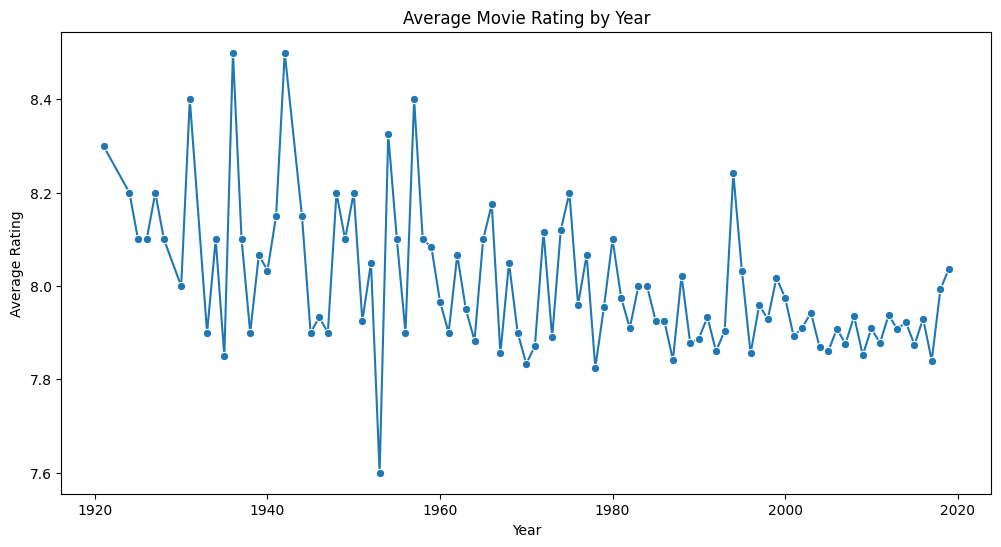

The year 1936 produced the highest-rated movies (avg rating = 8.50)


In [9]:
# Average rating per year
year_rating = df.groupby("year")["rating"].mean()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=year_rating.index, y=year_rating.values, marker="o")
plt.title("Average Movie Rating by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.show()

# Best year
best_year = year_rating.idxmax()
best_rating = year_rating.max()
print(f"The year {int(best_year)} produced the highest-rated movies (avg rating = {best_rating:.2f})")


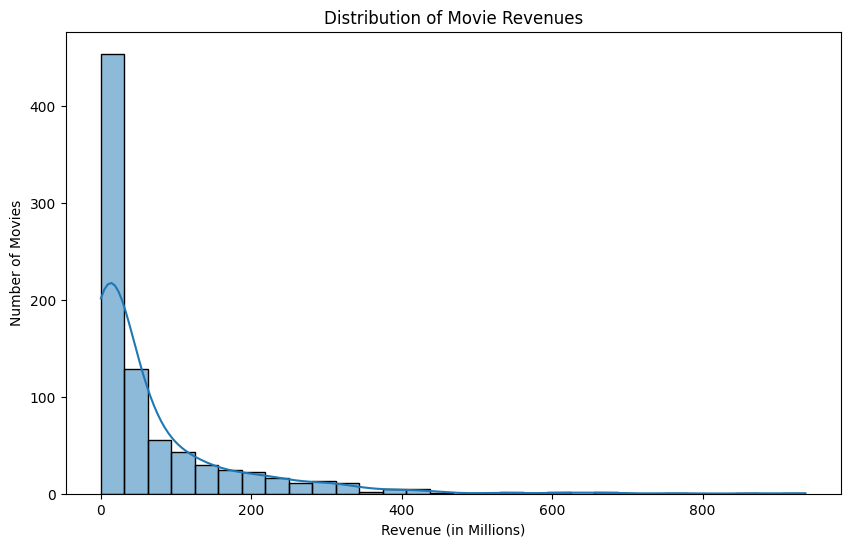

Average revenue of movies: $67,907,277


In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df["revenue"] / 1e6, bins=30, kde=True)
plt.title("Distribution of Movie Revenues")
plt.xlabel("Revenue (in Millions)")
plt.ylabel("Number of Movies")
plt.show()

print(f"Average revenue of movies: ${df['revenue'].mean():,.0f}")


In [11]:
print("📌 Final Insights:")
print(f"1. Top genres with highest ratings include: {', '.join(genre_rating.head(3).index)}.")
print(f"2. The best year for movies was {int(best_year)} with an average rating of {best_rating:.2f}.")
print(f"3. Average movie revenue is ${df['revenue'].mean():,.0f}, but distribution is highly skewed.")


📌 Final Insights:
1. Top genres with highest ratings include: Western, War, Film-Noir.
2. The best year for movies was 1936 with an average rating of 8.50.
3. Average movie revenue is $67,907,277, but distribution is highly skewed.


C:\Users\Admin\AppData\Local\Temp\ipykernel_10092\985307511.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="revenue", y="Series_Title", data=top_revenue, palette="viridis")


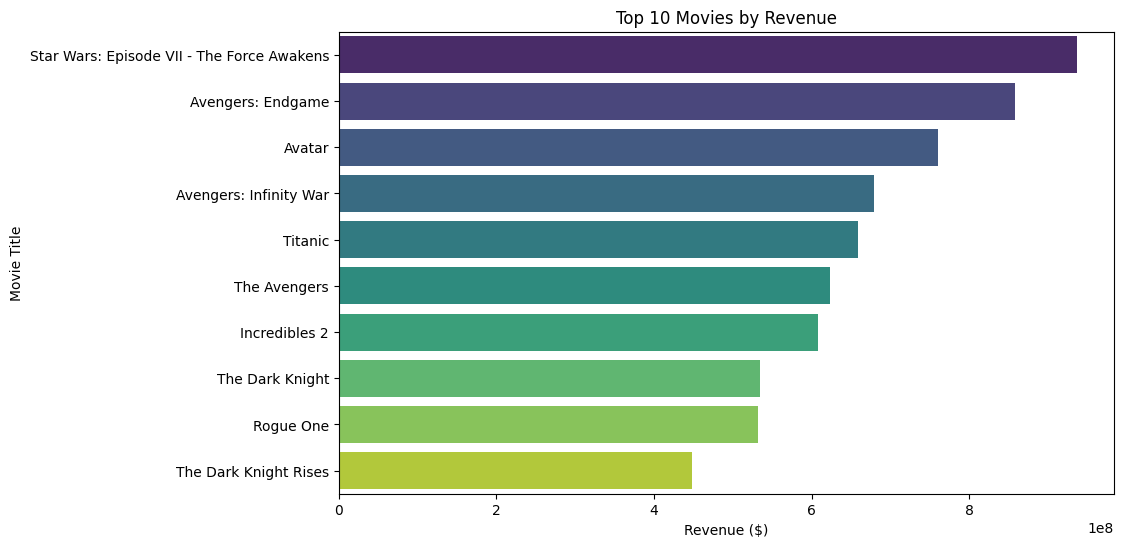

,Series_Title,year,rating,revenue
477,Star Wars: Episode VII - The Force Awakens,2015.0,7.9,936662225.0
59,Avengers: Endgame,2019.0,8.4,858373000.0
623,Avatar,2009.0,7.8,760507625.0
60,Avengers: Infinity War,2018.0,8.4,678815482.0
652,Titanic,1997.0,7.8,659325379.0
357,The Avengers,2012.0,8.0,623279547.0
891,Incredibles 2,2018.0,7.6,608581744.0
2,The Dark Knight,2008.0,9.0,534858444.0
582,Rogue One,2016.0,7.8,532177324.0
63,The Dark Knight Rises,2012.0,8.4,448139099.0


In [12]:
top_revenue = df.sort_values(by="revenue", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="revenue", y="Series_Title", data=top_revenue, palette="viridis")
plt.title("Top 10 Movies by Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("Movie Title")
plt.show()

top_revenue[["Series_Title", "year", "rating", "revenue"]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_10092\1672287280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating", y="Series_Title", data=top_movies, palette="magma")


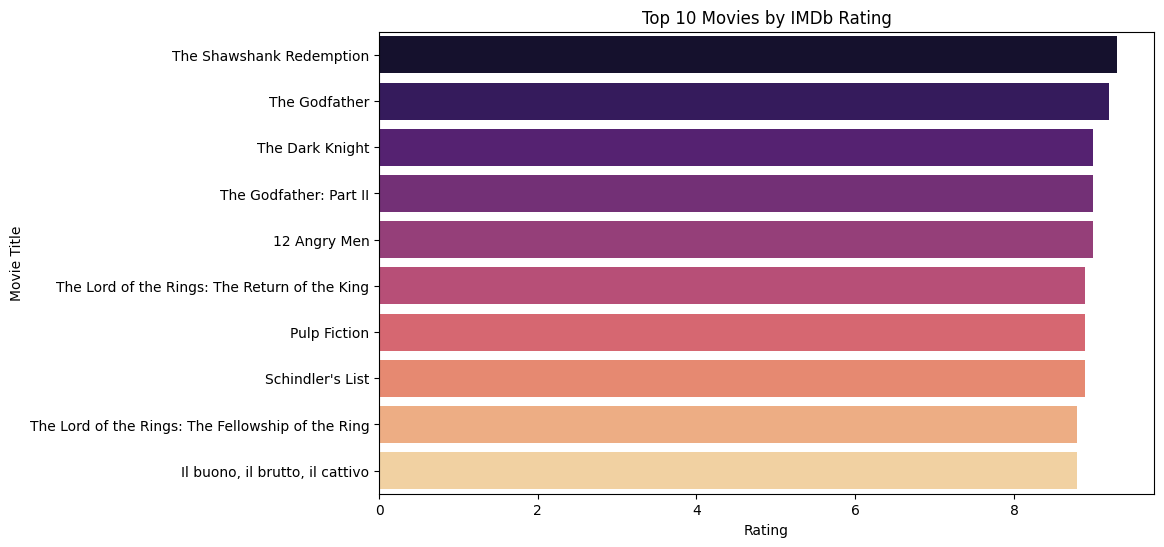

,Series_Title,year,rating,revenue
0,The Shawshank Redemption,1994.0,9.3,28341469.0
1,The Godfather,1972.0,9.2,134966411.0
2,The Dark Knight,2008.0,9.0,534858444.0
3,The Godfather: Part II,1974.0,9.0,57300000.0
4,12 Angry Men,1957.0,9.0,4360000.0
5,The Lord of the Rings: The Return of the King,2003.0,8.9,377845905.0
6,Pulp Fiction,1994.0,8.9,107928762.0
7,Schindler's List,1993.0,8.9,96898818.0
10,The Lord of the Rings: The Fellowship of the Ring,2001.0,8.8,315544750.0
12,"Il buono, il brutto, il cattivo",1966.0,8.8,6100000.0


In [13]:
top_movies = df.sort_values(by="rating", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="rating", y="Series_Title", data=top_movies, palette="magma")
plt.title("Top 10 Movies by IMDb Rating")
plt.xlabel("Rating")
plt.ylabel("Movie Title")
plt.show()

top_movies[["Series_Title", "year", "rating", "revenue"]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_10092\2565311638.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating", y="Series_Title", data=top_horror, palette="inferno")


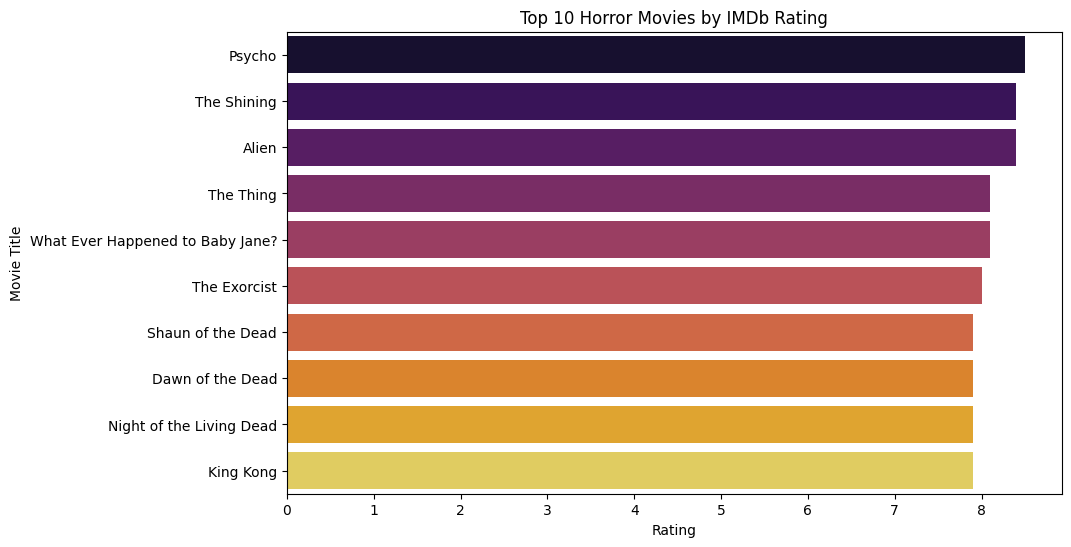

In [17]:
top_horror = horror_movies.sort_values(by="rating", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="rating", y="Series_Title", data=top_horror, palette="inferno")
plt.title("Top 10 Horror Movies by IMDb Rating")
plt.xlabel("Rating")
plt.ylabel("Movie Title")
plt.show()


In [18]:
print("🎬 IMDb Movie Dataset Analysis — Summary")
print("-" * 60)

# 1. Best genres
top_genres = genre_rating.head(3).index.tolist()
print(f"1️⃣ Top genres by average rating: {', '.join(top_genres)}")

# 2. Best year
print(f"2️⃣ The best year for movies was {int(best_year)} "
      f"with an average rating of {best_rating:.2f}")

# 3. Average revenue
print(f"3️⃣ Average movie revenue: ${df['revenue'].mean():,.0f}")

# 4. Best Horror movie
if not best_horror.empty:
    horror_title = best_horror.iloc[0]['Series_Title']
    horror_rating = best_horror.iloc[0]['rating']
    print(f"4️⃣ Best Horror movie: {horror_title} (Rating {horror_rating})")

print("-" * 60)
print("✅ Project Complete: Cleaned data, analyzed ratings, revenue, genres & identified top movies.")


🎬 IMDb Movie Dataset Analysis — Summary
------------------------------------------------------------
1️⃣ Top genres by average rating: Western, War, Film-Noir
2️⃣ The best year for movies was 1936 with an average rating of 8.50
3️⃣ Average movie revenue: $67,907,277
4️⃣ Best Horror movie: Psycho (Rating 8.5)
------------------------------------------------------------
✅ Project Complete: Cleaned data, analyzed ratings, revenue, genres & identified top movies.
